In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [85]:
df = pd.read_csv('C:/Users/TOSHIBA/anaconda3/META.csv')

In [86]:
print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  28/10/2021  312.989990  325.519989  308.109985  316.920013  316.584106   
1  29/10/2021  320.190002  326.000000  319.600006  323.570007  323.227051   
2  01/11/2021  326.040009  333.450012  326.000000  329.980011  329.630280   
3  02/11/2021  331.380005  334.790009  323.799988  328.079987  327.732269   
4  03/11/2021  327.489990  332.149994  323.200012  331.619995  331.268524   

     Volume  
0  50806800  
1  37059400  
2  31518900  
3  28353000  
4  20786500  


In [87]:
# Daftar kolom kategorikal yang ingin diubah
categorical_columns = ['Date']

In [88]:
# Buat instance dari LabelEncoder
label_encoder = LabelEncoder()

In [89]:
# Iterasi melalui daftar kolom kategorikal dan ubah menjadi numerik
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [90]:
# Menampilkan beberapa baris pertama dari DataFrame untuk verifikasi
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,576,312.989990,325.519989,308.109985,316.920013,316.584106,50806800
1,596,320.190002,326.000000,319.600006,323.570007,323.227051,37059400
2,17,326.040009,333.450012,326.000000,329.980011,329.630280,31518900
3,39,331.380005,334.790009,323.799988,328.079987,327.732269,28353000
4,62,327.489990,332.149994,323.200012,331.619995,331.268524,20786500
...,...,...,...,...,...,...,...
628,607,431.049988,439.619995,429.720001,430.170013,430.170013,18429500
629,9,428.600006,449.959991,427.109985,439.190002,439.190002,20344900
630,32,438.839996,443.959991,432.279999,441.679993,441.679993,15221300
631,55,445.929993,454.170013,443.850006,451.959991,451.959991,16489100


In [91]:
# Cek missing values
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [92]:
# Jika ada missing values, hapus baris yang mengandung missing values
df.dropna(inplace=True)

In [93]:
# Definisikan fitur dan target
X = df.drop("Volume", axis=1)
y = df["Volume"]

In [94]:
# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

In [96]:
# Melatih model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [97]:
# Prediksi dengan data uji
y_pred = model.predict(X_test)

In [98]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.0


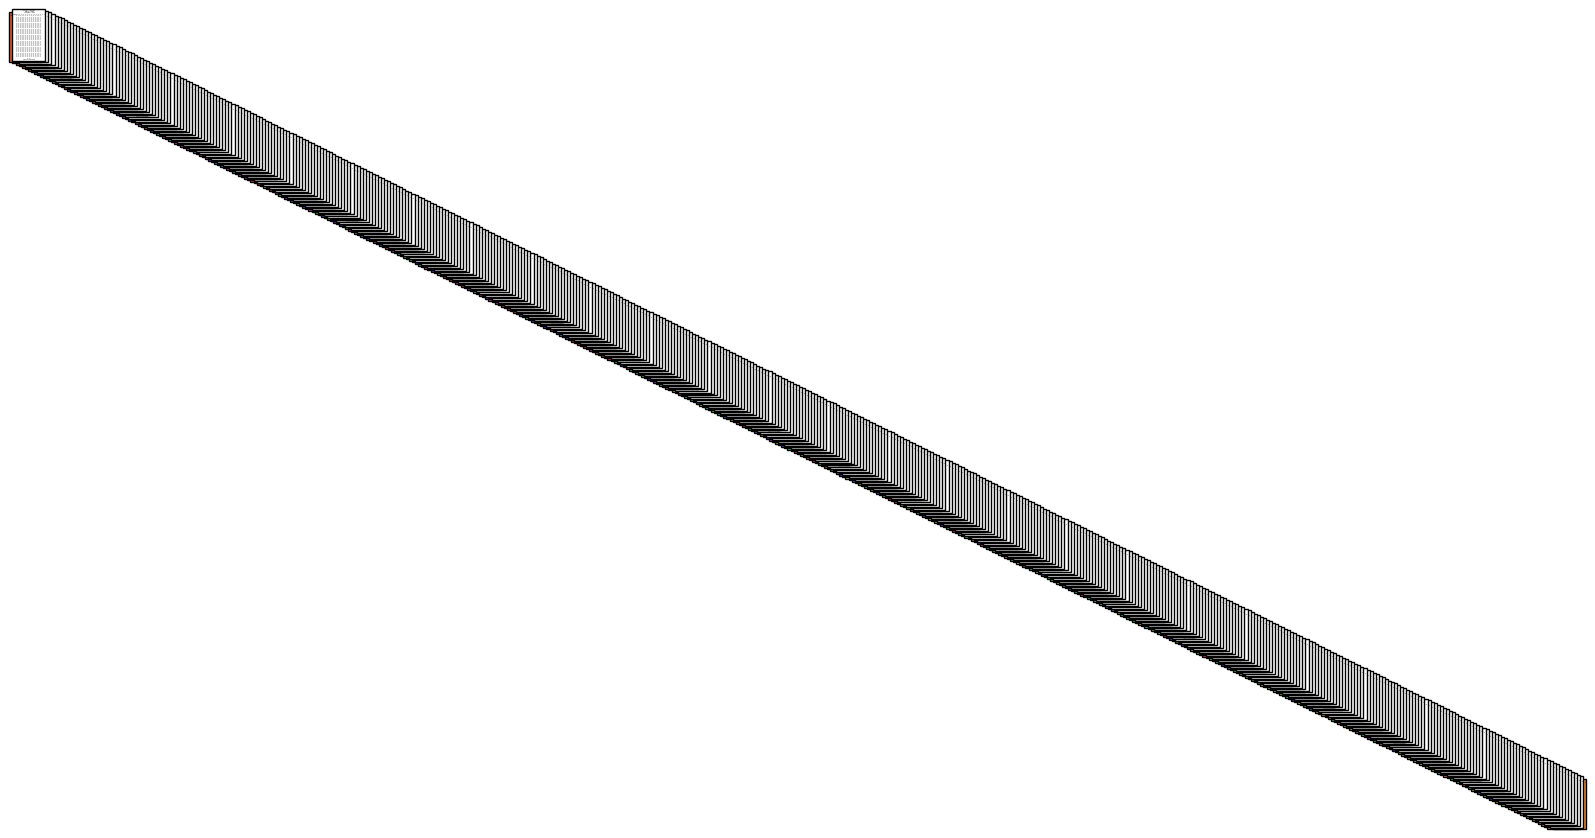

In [99]:
# Visualisasi Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.show()